# Working with Image Image Data

### Introduction

In the last lesson, we learned how to build a neural network that can take in an observation representin an image, and output a prediction with 10 outputs -- each representing the probability of an image being a different digit.  

So now that we understand the different layers of a neural network, it's time to better understand the image data itself, as well as how to work with tensors in a neural network.  

Ok, let's get started.

### Our image data

So now it's time to work with our image data of handwritten digits, known as the MNIST dataset.

<img src="./mnist.png" width="30%">

The easiest way to get these digits is to use a library called keras.

> Don't worry, we're still learning pytorch.  We'll just use keras for downloading our data, as it's a bit easier.

Let's see how easy it is to load some data with `keras`.  Simply press `shift + return` on the line of code below, and keras will download a set of images and their corresponding target values for us.

> **Note**: If trying to install keras on your laptop with Jupyter or Anaconda, run the following from the terminal:  `sudo pip3 install --upgrade --ignore-installed tensorflow`.  If you don't know what I'm talking about, just press shift + return on the cell below.

In [30]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

So we just downloaded our handwritten digits dataset.  And we assigned it's components to `X_train` `y_train`, `X_test`, `y_test`.  We'll learn about those different components later on.  For now let's focus on what we assigned to the `X_train` variable.  

The `X_train` variable points to list of our observations, where each observation is a photo of a different digit.  Let's see that.  We'll select the first image from our list with `X_train[0]`, and then plot it with the following:

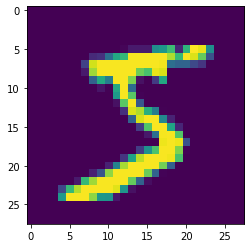

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

> And if you want to see the second image we can simply swap out the number `0` inside of the brackets and replace it with the number `1`, and then press `shift + return` again. 

Ok, so we saw that that we downloaded a list of images, and these images are assigned to the variable `X_train`.  Now how can we pass these images to our neural network?

### Exploring our data

So how will our neural network do that?  Well first we should understand that each image is really just a grid of numbers -- one number for each pixel in the picture.  Let's take a look.

> Uncomment the line below (by removing the `#` symbol) and pressing `shift + return`, then hide all of those numbers by adding back in the `#` in front of our code, and pressing `shift + return`.

In [32]:
# X_train[0]

The zeros essentially represent the black space around the edge of the frame, and then we have different grayscale numbers for the pixels representing the drawing.

If we look at the `shape` of the image, we can see that it's a 28 by 28 grid.

In [33]:
X_train[0].shape

(28, 28)

So each observation of a photo is really a grid of numbers where each number represents the grayscale value of the corresponding pixel.

### Working with our Data

Now we'd like to get started with feeding our downloaded data to a neural network, but first there are a couple of things to make sure we get straight.  The first is that, to feed our data into a Pytorch neural net, our data needs to be a tensor. 

Right now, it is not.

In [34]:
type(X_train)

numpy.ndarray

No big deal.  To convert the data into a tensor, we simply wrap our data in the tensor function.

In [35]:
import torch

X_tensor = torch.tensor(X_train)

In [36]:
type(X_tensor)

torch.Tensor

Now beyond converting the data to a Pytorch tensor, we'll also need to make sure the data is of the proper type.

In [37]:
X_tensor.dtype

torch.uint8

Currently, it is not.  Our data is type integer, but we need it to be of type float.  

> An integer just means that our data consists of whole numbers, where as floats have decimal points. 

In [38]:
X_tensor[:1, :2, :2]

tensor([[[0, 0],
         [0, 0]]], dtype=torch.uint8)

So let's convert our data to be of type float with the `.float()` method.

In [39]:
X_tensor_float = X_tensor.float()

So now if we look at our data, we'll notice that after every number is a decimal point.

In [40]:
X_tensor_float[:1, :2, :2]

tensor([[[0., 0.],
         [0., 0.]]])

And we can also confirm our data is of type float by checking the `dtype`.

In [41]:
X_tensor_float.dtype

torch.float32

So that's it.  We converted our data to be of type tensor and of type float.  Ok, now that our data is of the correct type, we'll just need to take one more step before passing through our data.

### Data Dimensions

Ok, so we successfully converted our data to the proper type, but we also need the dimensions of our data to be correct.  Let's check out the dimensions of our tensors with the `shape` attribute.

In [42]:
X_tensor.shape

torch.Size([60000, 28, 28])

So the above is saying that our `X_tensor` has 60,000 elements, where each element is a 28x28 grid of numbers like we saw above.  It turns out that to feed our data into a neural net, we cannot pass through a *grid* of pixels into our neural net, but rather will need to unspool each image into one long list.  

From what we know about the first layer of our neural network, this should make sense.  We want the features of our observation to be represented as a vector, that we dot with our weight matrix and then add a bias vector, like so.

> $z_{1x64} = x_{1x784} \cdot W_{784x64} + b_{1x64}$

So to do this, we'll need to convert our 28x28 grid into one long list. To see how we can do this let's just focus in on one image.

In [62]:
first_image = X_tensor_float[0]

first_image.shape

torch.Size([28, 28])

So this image is a $28x28$ grid of pixels and the total number of pixels is $28x28 = 784$.  And if we want to convert this into a list of length 784, we can do so with the following.

In [63]:
reshaped_img = first_image.view(784)

In [64]:
reshaped_img.shape

torch.Size([784])

> So now our reshaped image is just one long list of 784 pixels.

In [65]:
reshaped_img[:100]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

So with the view function, we can specify the new dimensions we want for that image -- here, a list of length 784.

Note that we can also go back into two dimensions.  And when we do, we specify the rows before the columns.  So if we want to convert our list to a tensor with 382 rows, with each row having two columns -- we use `view(382, 2)`.

In [66]:
again_reshaped = reshaped_img.view(392, 2)

> So we can see that each row has two columns.

In [67]:
again_reshaped[:5]

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

### Pytorch Does the math

One thing to note is that Pytorch only allows us to convert into dimensions where the math adds up.  So, for example, a 28x28 tensor has 784 total elements.  If we try to convert this tensor to be of length 783, then Pytorch will throw an error.

In [68]:
first_image.shape

torch.Size([28, 28])

In [69]:
first_image.view(783)

RuntimeError: shape '[783]' is invalid for input of size 784

So above, if were converting a 28x28 tensor to a single dimension, there's only one length that will work and it's 784.  It turns out that we can leave this number 784 unspecified and Pytorch will do the math for us.  Let's see this.   

> We start with our original shape.

In [70]:
first_image.shape

torch.Size([28, 28])

And then pass through a `-1` -- where the single number indicates we want to convert our data to one dimension, as a list.  And the -1 means that we'll let Pytorch calculate how long the list should be.

In [71]:
reshaped = first_image.view(-1)

reshaped.shape

torch.Size([784])

Note that Pytorch can also do this with two dimensional data.  So if we start with our tensor of one long list of 784, and then want to convert it to two rows, Pytorch will calculate the number of columns.

In [72]:
two_rows = reshaped.view(2, -1)

In [73]:
two_rows.shape

torch.Size([2, 392])

### Putting it together

Ok, so why are we learning this again?  Well because when we want to feed our image data into a neural network, we'll need to reshape it.  Remember that our data starts as a tensor that consists of 60,000 images, each a 28x28 grid.

In [74]:
X_tensor_float.shape

torch.Size([60000, 28, 28])

And we we want to convert this to 60,000 elements, where each element is a list.  We do so with the following:

In [75]:
X_reshaped = X_tensor_float.view(60000, 784)

In [76]:
X_reshaped.shape

torch.Size([60000, 784])

Or we can even replace the last number with a `-1`, and Pytorch will know how to convert our tensor.

In [80]:
X_reshaped = X_tensor_float.view(60000, -1)

X_reshaped.shape

torch.Size([60000, 784])

And now that each picture is represented as one long list, we'll be able to select an image and feedd it to our neural network.

In [87]:
import torch.nn as nn

torch.manual_seed(5)

net = nn.Sequential(
    nn.Linear(784, 64),
    nn.Sigmoid(),
    nn.Linear(64, 10),
    nn.Softmax(dim = 0)
)

net

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=64, out_features=10, bias=True)
  (3): Softmax(dim=0)
)

In [88]:
first_image = X_reshaped[0]

net(first_image)

tensor([0.0932, 0.0650, 0.1019, 0.0727, 0.1276, 0.0904, 0.1655, 0.0714, 0.0802,
        0.1321], grad_fn=<SoftmaxBackward>)

### Summary

In this lesson, we learned how to work and reformat multidimensional data in Pytorch.  We saw that we can convert our data into a Pytorch tensor with the following:

In [90]:
import torch

X_tensor = torch.tensor(X_train)

And that we can change the datatype to be a float with the `float()` method.

In [91]:
X_tensor = X_tensor.float()

In [92]:
X_tensor.dtype

torch.float32

From there, we can change the dimensions of our data.  Our data starts off where each image is represented as a grid.

In [93]:
X_tensor.shape

torch.Size([60000, 28, 28])

And we can reshape the data into a tensor of 60,000 elements, where each element is a long list with the following:

In [95]:
X_reshaped = X_tensor.view(60000, 784)

And if we want, we can also replace one of the numbers with a -1, and Pytorch will calculate the size of the missing dimension.

In [96]:
X_reshaped = X_tensor.view(60000, -1)

In [97]:
X_reshaped.shape

torch.Size([60000, 784])

### Resources

[Colab Deep Learning](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=d44TznbgZZgm)